**Digging Deep into the Plot**

Cinema is always an Interesting topic.Those Frames,Actions,Thrilling story line, Artwork everything is exciting.And yes even the dataset is also exciting.We have around 45,000 movie data here collected from TMDB. I will try to explore statistical information from the dataset with Plots and Graphs.

In [1]:
#import necessary modules

import json
import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#importing dataset (csv file)
data = pd.read_csv('../input/movies_metadata.csv')


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Understanding the Data**

Before Performing our operations on Dataset will try to get the basic information about the data,i.e the number of columns,what they are and their datatypes. And total null values in a specific column. 




In [2]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

**Identifying the important columns and cleaning the data**

Now we will identify the important columns that we will work with in this project. We can extract meaningful data from following columns,

* adult
* budget
* revenue
* popularity
* title
* vote_count
* vote_average
* release_date
* runtime


Now as we can see some features has NaN values and columns like budget are in Object type which is not a suitable one to perform operations.So will convert that into float and will extract only year from release_date.


In [4]:
#Converting to float and replacing '0' wit NaN
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['popularity'] = data['popularity'].replace(0, np.nan)

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['budget'] = data['budget'].replace(0, np.nan)

data['revenue'] = data['revenue'].replace(0, np.nan)

#Extracting Only year in release_date to make it simpler
data['year'] = pd.to_datetime(data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

data['runtime'] = data['runtime'].astype('float')
data['vote_average'] = data['vote_average'].astype('float')
data['vote_count'] = data['vote_count'].astype('float')

**Budget and Revenue:**

A movie attracts many people in many ways, some may like the plot,songs,action bla bla. But when it comes to business end the equation is clear cut,How much did it earn? what is the % of return? So will analyse the budget and revenue aspects below. 

In [5]:
data[data['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)


,title,budget,revenue,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
11067,Superman Returns,270000000.0,3.910812e+08,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2017
16130,Tangled,260000000.0,5.917949e+08,2010
18685,John Carter,260000000.0,2.841391e+08,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,2013


Above is the Top 10 movies with **Highest budget**. **Pirates of the Caribbean** franchise Tops with 2 spots.
You can get Movies with lowest budget by just replacing **head() **with **tail()**

Now lets see Top 10 Movies with **Maximum Revenue**

In [6]:
data[data['revenue'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)


,title,budget,revenue,year
14551,Avatar,237000000.0,2.787965e+09,2009
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,Titanic,200000000.0,1.845034e+09,1997
17818,The Avengers,220000000.0,1.519558e+09,2012
25084,Jurassic World,150000000.0,1.513529e+09,2015
28830,Furious 7,190000000.0,1.506249e+09,2015
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,Frozen,150000000.0,1.274219e+09,2013
42222,Beauty and the Beast,160000000.0,1.262886e+09,2017


**Avatar** turns out to be the highest earning film. No wonder. But Guess what? I have not watched it yet.
Happy to see **Harry Potter** in the list.My personal favorite.

**
Now Will analyse the Revenue trend over the past century. **
Here is what we need to do for that,
* First will get the movie rows in which revenue field is not null.
* Will make a dataframe with only 2 columns i.e year and revenue.
* Now will groupby year - which gives total movies in a particular year.
* Will take the mean of revenue of each year.
* Finally will plot it using Matplot.
So let's Implement

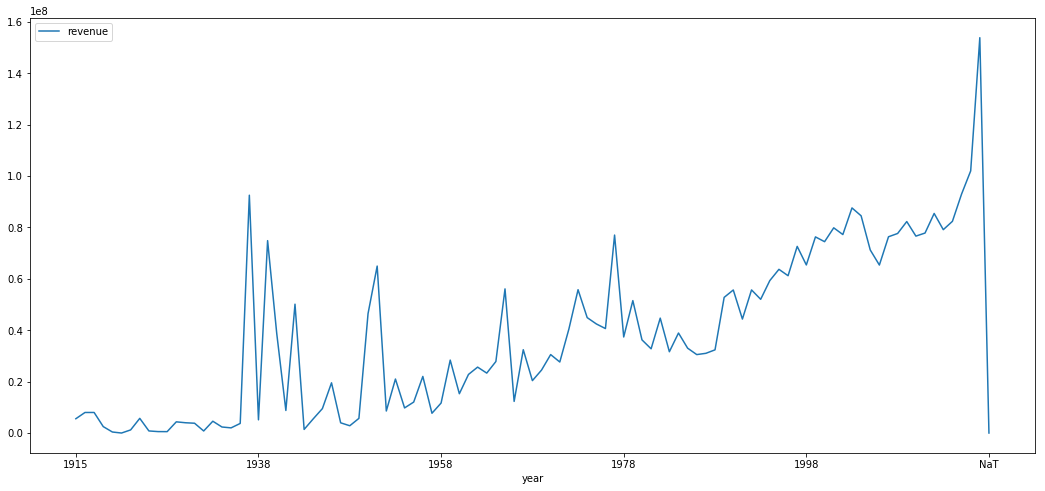

In [7]:
year_rev = (data[data['revenue'].notnull()][['year','revenue']].groupby('year').mean())
year_rev.plot(figsize=(18,8))

**So Now let's  Concentarte on Vote Count,Vote average and Popularity of movies.**

Will get Top 10 Movies with Most vote counts and Max vote average.

Here is a twist, While extracting Vote average we need to consider movies with atleast 3000 votes to be a fare data. 

In [8]:
data[data['vote_count'].notnull()][['title','revenue', 'year','vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,revenue,year,vote_count
15480,Inception,8.255328e+08,2010,14075.0
12481,The Dark Knight,1.004558e+09,2008,12269.0
14551,Avatar,2.787965e+09,2009,12114.0
17818,The Avengers,1.519558e+09,2012,12000.0
26564,Deadpool,7.831130e+08,2016,11444.0
22879,Interstellar,6.751200e+08,2014,11187.0
20051,Django Unchained,4.253682e+08,2012,10297.0
23753,Guardians of the Galaxy,7.733286e+08,2014,10014.0
2843,Fight Club,1.008538e+08,1999,9678.0
18244,The Hunger Games,6.912107e+08,2012,9634.0


In [9]:
data[data['vote_count'] > 3000][['title','revenue', 'year','vote_average']].sort_values('vote_average', ascending=False).head(10)

,title,revenue,year,vote_average
314,The Shawshank Redemption,2.834147e+07,1994,8.5
834,The Godfather,2.450664e+08,1972,8.5
522,Schindler's List,3.213656e+08,1993,8.3
1178,The Godfather: Part II,4.754284e+07,1974,8.3
2843,Fight Club,1.008538e+08,1999,8.3
2211,Life Is Beautiful,2.294000e+08,1997,8.3
1152,One Flew Over the Cuckoo's Nest,1.089813e+08,1975,8.3
292,Pulp Fiction,2.139288e+08,1994,8.3
12481,The Dark Knight,1.004558e+09,2008,8.3
5481,Spirited Away,2.749251e+08,2001,8.3


Well well well **Inception** tops with 14k votes. No Wonder as its been discussed all over Internet. And **The Dark night** behind it. Hatsoff to **Christopher Nolan.**

**The Godfather,
The Shawshank Redemption,
Schindler's List** All deserved to be in the spot.


Now Will get the Most popular movies of all time. Excited? Oh yes,I'm. I hope **Harry Potter** makes it to the list.Let's see.

In [10]:
data[data['popularity'].notnull()][['title','popularity']].sort_values('popularity',ascending=False).head(10)

,title,popularity
30700,Minions,547.488298
33356,Wonder Woman,294.337037
42222,Beauty and the Beast,287.253654
43644,Baby Driver,228.032744
24455,Big Hero 6,213.849907
26564,Deadpool,187.860492
26566,Guardians of the Galaxy Vol. 2,185.330992
14551,Avatar,185.070892
24351,John Wick,183.870374
23675,Gone Girl,154.801009


Wooh! **Minions(Despicable Me)** on TOP with Huge diffrence. Did You know? Minions is also the second-highest-grossing animated film of all time. No HP in the list! But **Hermoine Granger** comes for the resque.
And also I suggest you people to replace** head() with tail() **in the code to see Least popular movies! It's sort of Fun! Go ahead!

Will come to the trend of movie runtime! You can extract details of Longest runtime movies and least runtime movies with same code as above by replacing the column with 'runtime'.
But now I will concentrate on displaying the runtime trend over the century. We will use sns distplot to achieve this.

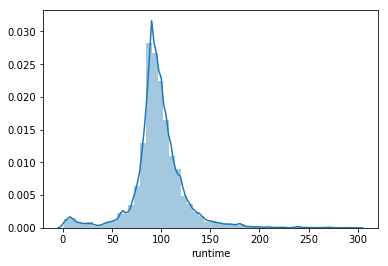

In [11]:
sns.distplot(data[(data['runtime'] < 300) & (data['runtime'] > 0)]['runtime'])

As the plot describes Most movies has an runtime between **90 mins to 120 mins. **

Now let's make things a bit **naughty.** Will extract all movies which has been rated **Adult**

In [12]:
data[data['adult'] == 'True'][['title','year','vote_average']]

,title,year,vote_average
19489,Erotic Nights of the Living Dead,1980,2.2
28701,Standoff,1998,4.8
31934,Electrical Girl,2001,0.0
32113,Diet of Sex,2014,4.0
39901,Amateur Porn Star Killer 2,2008,6.3
39902,The Band,2009,3.3
40574,The Sinful Dwarf,1973,5.8
41009,Adulterers,2016,5.2
43090,Half -Life,NaT,3.7


There you go! You have your list, Go and explore! (No offense to above movies,but i dont see any one with that level of content) But I can suggest you my favorite list. Watch **American Pie Series,Van wilder** series if you haven't yet.

Let's come to the numbers again! Will see  **number of movie released year by year** with a plot. 

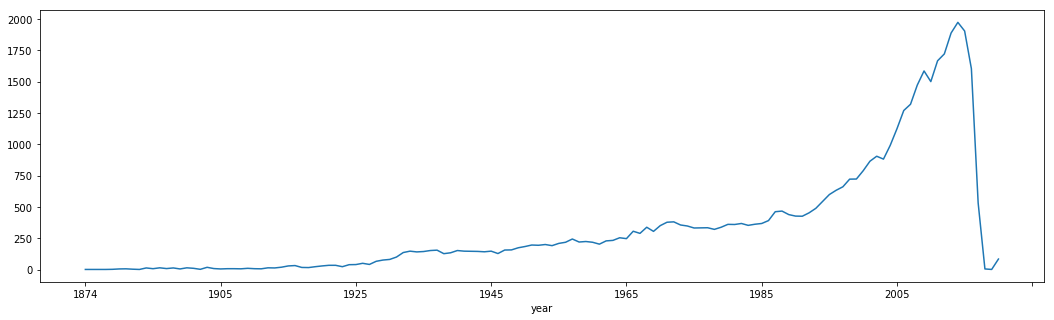

In [13]:
all_year = data.groupby('year')['title'].count()
all_year.plot(figsize=(18,5))

Ok Folk's that a wrap for now. Will add many more things in future.(We still have a lot of data to explore). 

As they say ** A Picture says a thousand words, A graph also tells a thousand rows **

Comment your views and feedback. Will catch You soon.
